In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [2]:
ds=pd.read_csv(r"C:\Users\User\Desktop\new datasets\customer_churn.csv")

In [3]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
ds.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
ds.drop(['customerID', 'gender','Partner','Dependents','PaperlessBilling','PaymentMethod'],axis='columns',inplace=True)

In [6]:
ds.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [7]:
ds.sample(25)

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
4215,0,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,108.20,7840.6,No
3950,1,49,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,96.20,4718.25,Yes
3090,0,1,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,53.50,53.5,Yes
62,0,72,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,42.10,2962,No
2118,0,22,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,80.15,1790.65,No
5507,0,28,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,59.90,1654.7,No
3559,0,27,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,470,No
6587,1,64,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,103.50,6548.65,No
229,0,47,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,85.30,4107.25,No
183,0,33,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,One year,74.75,2453.3,No


In [8]:
ds.describe()    

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   MultipleLines     7043 non-null   object 
 4   InternetService   7043 non-null   object 
 5   OnlineSecurity    7043 non-null   object 
 6   OnlineBackup      7043 non-null   object 
 7   DeviceProtection  7043 non-null   object 
 8   TechSupport       7043 non-null   object 
 9   StreamingTV       7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  MonthlyCharges    7043 non-null   float64
 13  TotalCharges      7043 non-null   object 
 14  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 825.5+ KB


In [10]:
ds.columns

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
ds['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [12]:
ds['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
ds.shape

(7043, 15)

In [14]:
ds.isnull().sum()

SeniorCitizen       0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
ds.sample(25)

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
6872,0,63,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,One year,81.15,5224.5,No
4151,1,57,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,55.00,3094.05,No
1892,1,4,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,50.95,207.35,No
1064,0,14,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,55.70,795.15,No
5851,1,35,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,110.80,3836.3,No
2877,0,61,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,99.15,6010.05,Yes
247,1,15,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,74.40,1074.3,Yes
4998,1,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,110.75,7053.35,No
3181,0,64,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,81.30,5129.3,No
6311,1,55,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,100.15,5409.75,No


In [16]:
pd.to_numeric(ds['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [17]:
ds.iloc[488]

SeniorCitizen                      0
tenure                             0
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                   Yes
OnlineBackup                      No
DeviceProtection                 Yes
TechSupport                      Yes
StreamingTV                      Yes
StreamingMovies                   No
Contract                    Two year
MonthlyCharges                 52.55
TotalCharges                        
Churn                             No
Name: 488, dtype: object

In [18]:
pd.to_numeric(ds['TotalCharges'],errors='coerce').isnull().sum()

11

In [19]:
ds.shape

(7043, 15)

In [20]:
ds1=ds[ds['TotalCharges']!=' ']
#ds.dropna(inplace=True)

In [21]:
ds1.shape

(7032, 15)

In [22]:
ds1.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [23]:
ds1['TotalCharges']=pd.to_numeric(ds1['TotalCharges'])

C:\Users\User\AppData\Local\Temp\ipykernel_272\2896268905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['TotalCharges']=pd.to_numeric(ds1['TotalCharges'])


In [24]:
ds1['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [25]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   tenure            7032 non-null   int64  
 2   PhoneService      7032 non-null   object 
 3   MultipleLines     7032 non-null   object 
 4   InternetService   7032 non-null   object 
 5   OnlineSecurity    7032 non-null   object 
 6   OnlineBackup      7032 non-null   object 
 7   DeviceProtection  7032 non-null   object 
 8   TechSupport       7032 non-null   object 
 9   StreamingTV       7032 non-null   object 
 10  StreamingMovies   7032 non-null   object 
 11  Contract          7032 non-null   object 
 12  MonthlyCharges    7032 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Churn             7032 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 879.0+ KB


In [26]:
ds1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
ds1.columns

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
ds1['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [29]:
ds1['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [30]:
ds1['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
ds1['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [32]:
ds1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [33]:
ds1['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [34]:
ds1['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [35]:
ds1['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [36]:
ds1['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [37]:
ds1['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [38]:
ds1['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [39]:
ds1['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [40]:
ds1['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [41]:
ds1['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [42]:
ds1['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
ds1.replace('No phone service','No',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_272\3044055027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1.replace('No phone service','No',inplace=True)


In [44]:
ds1['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
ds1.replace('No internet service','No',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_272\2956710029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1.replace('No internet service','No',inplace=True)


In [46]:
ds1.sample(25)

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
3940,0,19,No,No,DSL,No,No,No,No,No,No,Month-to-month,25.15,468.35,No
1095,0,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,80.55,80.55,No
3702,1,20,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,79.15,1520.90,Yes
6480,0,13,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,53.45,718.10,No
3787,0,58,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,95.30,5817.70,No
1850,1,47,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,67.45,3252.00,No
1954,0,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,75.45,75.45,Yes
1133,0,2,Yes,No,No,No,No,No,No,No,No,Month-to-month,19.25,48.35,No
4506,1,72,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,77.35,5396.25,No
6887,0,35,Yes,Yes,No,No,No,No,No,No,No,Two year,24.30,821.60,No


In [47]:
ds1.columns

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
ds1.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,0,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [49]:
yes_no=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']
for i in yes_no:
    ds1[i].replace({'Yes':1,'No':0},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_272\3936975293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1[i].replace({'Yes':1,'No':0},inplace=True)


In [50]:
ds1.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,29.85,29.85,0
1,0,34,1,0,DSL,1,0,1,0,0,0,One year,56.95,1889.50,0
2,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,53.85,108.15,1
3,0,45,0,0,DSL,1,0,1,1,0,0,One year,42.30,1840.75,0
4,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,70.70,151.65,1


In [51]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   tenure            7032 non-null   int64  
 2   PhoneService      7032 non-null   int64  
 3   MultipleLines     7032 non-null   int64  
 4   InternetService   7032 non-null   object 
 5   OnlineSecurity    7032 non-null   int64  
 6   OnlineBackup      7032 non-null   int64  
 7   DeviceProtection  7032 non-null   int64  
 8   TechSupport       7032 non-null   int64  
 9   StreamingTV       7032 non-null   int64  
 10  StreamingMovies   7032 non-null   int64  
 11  Contract          7032 non-null   object 
 12  MonthlyCharges    7032 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Churn             7032 non-null   int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 879.0+ KB


In [52]:
ds1['InternetService']=ds1['InternetService'].astype('category')
ds1['InternetService']=ds1['InternetService'].cat.codes

C:\Users\User\AppData\Local\Temp\ipykernel_272\1348478363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['InternetService']=ds1['InternetService'].astype('category')
C:\Users\User\AppData\Local\Temp\ipykernel_272\1348478363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['InternetService']=ds1['InternetService'].cat.codes


In [53]:
ds1['Contract']=ds1['Contract'].astype('category')
ds1['Contract']=ds1['Contract'].cat.codes

C:\Users\User\AppData\Local\Temp\ipykernel_272\2806050445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['Contract']=ds1['Contract'].astype('category')
C:\Users\User\AppData\Local\Temp\ipykernel_272\2806050445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['Contract']=ds1['Contract'].cat.codes


In [54]:
ds1.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,1,0,0,0,0,0,29.85,29.85,0
1,0,34,1,0,1,1,0,1,0,0,0,1,56.95,1889.50,0
2,0,2,1,0,1,1,1,0,0,0,0,0,53.85,108.15,1
3,0,45,0,0,1,1,0,1,1,0,0,1,42.30,1840.75,0
4,0,2,1,0,2,0,0,0,0,0,0,0,70.70,151.65,1


In [55]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   tenure            7032 non-null   int64  
 2   PhoneService      7032 non-null   int64  
 3   MultipleLines     7032 non-null   int64  
 4   InternetService   7032 non-null   int8   
 5   OnlineSecurity    7032 non-null   int64  
 6   OnlineBackup      7032 non-null   int64  
 7   DeviceProtection  7032 non-null   int64  
 8   TechSupport       7032 non-null   int64  
 9   StreamingTV       7032 non-null   int64  
 10  StreamingMovies   7032 non-null   int64  
 11  Contract          7032 non-null   int8   
 12  MonthlyCharges    7032 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Churn             7032 non-null   int64  
dtypes: float64(2), int64(11), int8(2)
memory usage: 782.9 KB


In [56]:
ds1.columns

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [57]:
col_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
ds1[col_scale]=scaler.fit_transform(ds1[col_scale])

C:\Users\User\AppData\Local\Temp\ipykernel_272\1191850788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1[col_scale]=scaler.fit_transform(ds1[col_scale])


In [58]:
ds1.head() 

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0.000000,0,0,1,0,1,0,0,0,0,0,0.115423,0.001275,0
1,0,0.464789,1,0,1,1,0,1,0,0,0,1,0.385075,0.215867,0
2,0,0.014085,1,0,1,1,1,0,0,0,0,0,0.354229,0.010310,1
3,0,0.619718,0,0,1,1,0,1,1,0,0,1,0.239303,0.210241,0
4,0,0.014085,1,0,2,0,0,0,0,0,0,0,0.521891,0.015330,1


In [59]:
ds1.columns

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [60]:
x=ds1.drop(['Churn'],axis=1)
y=ds1[['Churn']]

In [61]:
x

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
0,0,0.000000,0,0,1,0,1,0,0,0,0,0,0.115423,0.001275
1,0,0.464789,1,0,1,1,0,1,0,0,0,1,0.385075,0.215867
2,0,0.014085,1,0,1,1,1,0,0,0,0,0,0.354229,0.010310
3,0,0.619718,0,0,1,1,0,1,1,0,0,1,0.239303,0.210241
4,0,0.014085,1,0,2,0,0,0,0,0,0,0,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,1,1,1,1,0,1,1,1,1,1,0.662189,0.227521
7039,0,1.000000,1,1,2,0,1,1,0,1,1,1,0.845274,0.847461
7040,0,0.140845,0,0,1,1,0,0,0,0,0,0,0.112935,0.037809
7041,1,0.042254,1,1,2,0,0,0,0,0,0,0,0.558706,0.033210


In [62]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:
x_train.shape

(5625, 14)

In [65]:
ds.shape

(7043, 15)

In [66]:
ds1.shape

(7032, 15)

In [67]:
x_test.shape

(1407, 14)

In [69]:
model=keras.Sequential([
    keras.layers .Dense(1,input_shape=(14,),activation='sigmoid')
])    # input layer
      #14 => no.of columns present in x_train
      # 1=> the possible outcome Yes(1) or No(0)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
176/176 [==============================] - 1s 3ms/step - loss: 0.5874 - accuracy: 0.7273
Epoch 2/5
176/176 [==============================] - 1s 3ms/step - loss: 0.5373 - accuracy: 0.7415
Epoch 3/5
176/176 [==============================] - 1s 3ms/step - loss: 0.5042 - accuracy: 0.7502
Epoch 4/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4816 - accuracy: 0.7605
Epoch 5/5
176/176 [==============================] - 1s 3ms/step - loss: 0.4660 - accuracy: 0.7774


In [70]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.7953


[0.4533143639564514, 0.7953091859817505]

In [71]:
y_predict=model.predict(x_test)
y_predict[:10]      # >0.5 = 1 , <0.5 =0

44/44 [==============================] - 0s 3ms/step


array([[0.34932825],
       [0.29956183],
       [0.34841335],
       [0.5012302 ],
       [0.5394001 ],
       [0.34059724],
       [0.18314043],
       [0.5249702 ],
       [0.3386868 ],
       [0.23918585]], dtype=float32)

In [72]:
y_pred=[]
for ele in y_predict:
    if ele>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [73]:
y_pred[:15]

[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [74]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

cm


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[982,  56],
       [232, 137]])>

Text(50.722222222222214, 0.5, 'predicted')

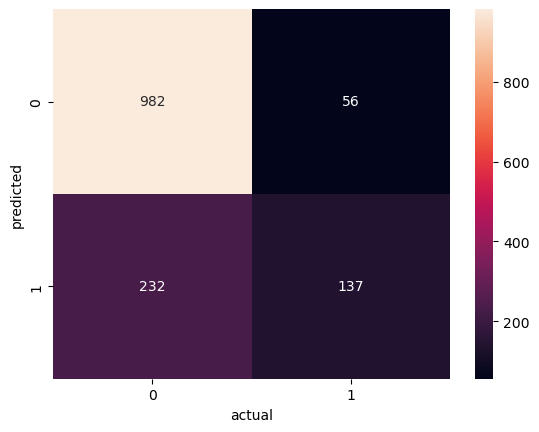

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('actual')
plt.ylabel('predicted')
            

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1038
           1       0.71      0.37      0.49       369

    accuracy                           0.80      1407
   macro avg       0.76      0.66      0.68      1407
weighted avg       0.78      0.80      0.77      1407



In [78]:
model=keras.Sequential([
    # input layer
    # 100 => no.of nodes in hidden layer 1
    keras.layers.Dense(100,input_shape=(14,),activation='sigmoid'),
    # hidden layer 1
    # 80 => no.of nodes in hidden layer 2
    keras.layers.Dense(80,activation='sigmoid'),
    # hidden layer 2
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=8)

Epoch 1/8
176/176 [==============================] - 2s 3ms/step - loss: 0.5428 - accuracy: 0.7346
Epoch 2/8
176/176 [==============================] - 1s 3ms/step - loss: 0.4399 - accuracy: 0.7860
Epoch 3/8
176/176 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.7876
Epoch 4/8
176/176 [==============================] - 1s 3ms/step - loss: 0.4299 - accuracy: 0.7900
Epoch 5/8
176/176 [==============================] - 1s 3ms/step - loss: 0.4258 - accuracy: 0.7966
Epoch 6/8
176/176 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.7931
Epoch 7/8
176/176 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.7972
Epoch 8/8
176/176 [==============================] - 1s 3ms/step - loss: 0.4258 - accuracy: 0.7940


In [79]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8038


[0.42388466000556946, 0.8038379549980164]

In [80]:
y_predicted=model.predict(x_test)
y_predicted[:10]

44/44 [==============================] - 0s 3ms/step


array([[0.19303946],
       [0.14144771],
       [0.19225451],
       [0.44577056],
       [0.75232744],
       [0.370425  ],
       [0.27297667],
       [0.6388599 ],
       [0.18133576],
       [0.34011948]], dtype=float32)

In [81]:
y_pred=[]
for ele in y_predicted:
    if ele>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [82]:
y_pred[:10]

[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]

In [83]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

cm


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[929, 109],
       [167, 202]])>

Text(50.722222222222214, 0.5, 'predicted')

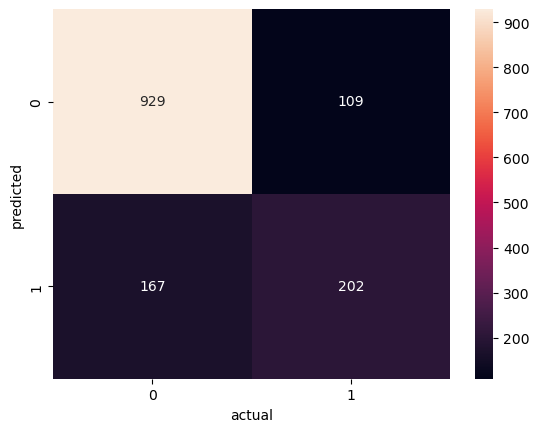

In [84]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('actual')
plt.ylabel('predicted')

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1038
           1       0.65      0.55      0.59       369

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407

